<a href="https://colab.research.google.com/github/likit/Advanced-community-health-course/blob/main/TATAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
TAT_CUTOFF = 60
GOAL = 0.9

In [2]:
import pandas as pd

In [7]:
results_df = pd.read_excel('results.xlsx',
                           parse_dates=['receive_datetime', 'reported_datetime'])

In [8]:
results_df

,id,num_result,text_result,reported_datetime,reporter_id,test_id,reject_record_id,receive_datetime,received_by,order_id
0,17155,NaN,NaN,NaT,1,311,899.0,NaT,NaN,2189
1,17156,671.0,NaN,2024-03-15 08:40:15,1,308,NaN,2024-03-15 07:41:15,NaN,2189
2,17157,NaN,Detected,2024-03-15 08:25:15,1,317,NaN,2024-03-15 07:38:15,NaN,2189
3,17170,NaN,NaN,NaT,1,324,901.0,NaT,NaN,2194
4,17171,879.0,NaN,2024-03-15 08:32:25,1,308,NaN,2024-03-15 07:43:25,NaN,2194
...,...,...,...,...,...,...,...,...,...,...
163,17575,NaN,Undetected,2024-03-15 09:42:55,1,317,NaN,2024-03-15 08:30:55,NaN,2271
164,17576,NaN,Negative,2024-03-15 09:15:55,1,325,NaN,2024-03-15 08:26:55,NaN,2271
165,17577,NaN,Negative,2024-03-15 09:23:55,1,324,NaN,2024-03-15 08:18:55,NaN,2271
166,17578,964.0,NaN,2024-03-15 09:15:55,1,319,NaN,2024-03-15 08:24:55,NaN,2271


In [9]:
results_df['reported_datetime']

0                     NaT
1     2024-03-15 08:40:15
2     2024-03-15 08:25:15
3                     NaT
4     2024-03-15 08:32:25
              ...        
163   2024-03-15 09:42:55
164   2024-03-15 09:15:55
165   2024-03-15 09:23:55
166   2024-03-15 09:15:55
167   2024-03-15 09:38:55
Name: reported_datetime, Length: 168, dtype: datetime64[ns]

In [11]:
tat = results_df['reported_datetime'] - results_df['receive_datetime']

In [13]:
tat

0                 NaT
1     0 days 00:59:00
2     0 days 00:47:00
3                 NaT
4     0 days 00:49:00
            ...      
163   0 days 01:12:00
164   0 days 00:49:00
165   0 days 01:05:00
166   0 days 00:51:00
167   0 days 01:08:00
Length: 168, dtype: timedelta64[ns]

In [14]:
tat/pd.Timedelta(minutes=1)

0       NaN
1      59.0
2      47.0
3       NaN
4      49.0
       ... 
163    72.0
164    49.0
165    65.0
166    51.0
167    68.0
Length: 168, dtype: float64

In [15]:
tat/pd.Timedelta(minutes=1) > TAT_CUTOFF

0      False
1      False
2      False
3      False
4      False
       ...  
163     True
164    False
165     True
166    False
167     True
Length: 168, dtype: bool

In [17]:
sum(tat/pd.Timedelta(minutes=1) > TAT_CUTOFF)/len(tat)

0.44642857142857145

In [18]:
results_df['tat_minutes'] = tat/pd.Timedelta(minutes=1)

In [19]:
results_df

,id,num_result,text_result,reported_datetime,reporter_id,test_id,reject_record_id,receive_datetime,received_by,order_id,tat_minutes
0,17155,NaN,NaN,NaT,1,311,899.0,NaT,NaN,2189,NaN
1,17156,671.0,NaN,2024-03-15 08:40:15,1,308,NaN,2024-03-15 07:41:15,NaN,2189,59.0
2,17157,NaN,Detected,2024-03-15 08:25:15,1,317,NaN,2024-03-15 07:38:15,NaN,2189,47.0
3,17170,NaN,NaN,NaT,1,324,901.0,NaT,NaN,2194,NaN
4,17171,879.0,NaN,2024-03-15 08:32:25,1,308,NaN,2024-03-15 07:43:25,NaN,2194,49.0
...,...,...,...,...,...,...,...,...,...,...,...
163,17575,NaN,Undetected,2024-03-15 09:42:55,1,317,NaN,2024-03-15 08:30:55,NaN,2271,72.0
164,17576,NaN,Negative,2024-03-15 09:15:55,1,325,NaN,2024-03-15 08:26:55,NaN,2271,49.0
165,17577,NaN,Negative,2024-03-15 09:23:55,1,324,NaN,2024-03-15 08:18:55,NaN,2271,65.0
166,17578,964.0,NaN,2024-03-15 09:15:55,1,319,NaN,2024-03-15 08:24:55,NaN,2271,51.0


In [20]:
results_df['tat_minutes'].describe()

count    160.000000
mean      56.343646
std       21.001269
min        0.400000
25%       38.500000
50%       59.000000
75%       74.000000
max       90.000000
Name: tat_minutes, dtype: float64

<Axes: ylabel='Frequency'>

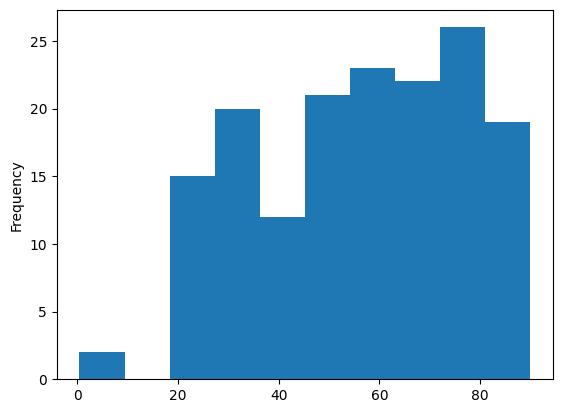

In [21]:
results_df['tat_minutes'].plot.hist()

<Axes: >

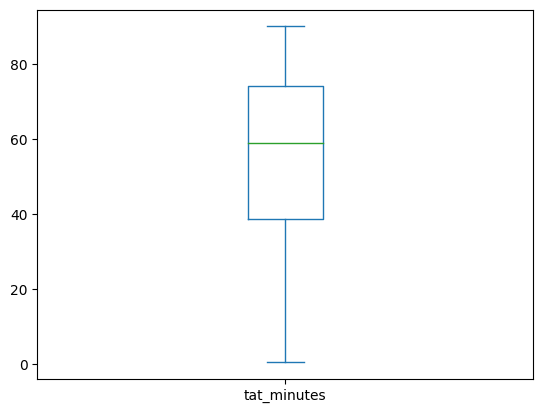

In [22]:
results_df['tat_minutes'].plot.box()

In [23]:
tests_df = pd.read_excel('tests.xlsx')

In [24]:
tests_df

,id,name,detail,min_value,max_value,min_ref_value,max_ref_value,data_type,active
0,308,Fasting blood glucose,NaN,0.0,NaN,80.0,100.0,Numeric,True
1,311,TG,Triglyceride,0.0,NaN,NaN,150.0,Numeric,True
2,317,COVID-19 RT-PCR,NaN,0.0,NaN,NaN,NaN,Text,True
3,319,HDL,NaN,0.0,NaN,40.0,NaN,Numeric,True
4,324,Flu A,NaN,0.0,NaN,NaN,NaN,Text,True
5,325,Dengue virus,NaN,0.0,NaN,NaN,NaN,Text,True


In [30]:
tests_df[['id', 'name']]

,id,name
0,308,Fasting blood glucose
1,311,TG
2,317,COVID-19 RT-PCR
3,319,HDL
4,324,Flu A
5,325,Dengue virus


In [33]:
results_tests_df = pd.merge(results_df,
                            tests_df[['id', 'name']],
                            left_on='test_id',
                            right_on='id',
                            how='left')

In [35]:
results_tests_df[['name', 'tat_minutes']]

,name,tat_minutes
0,TG,NaN
1,Fasting blood glucose,59.0
2,COVID-19 RT-PCR,47.0
3,Flu A,NaN
4,Fasting blood glucose,49.0
...,...,...
163,COVID-19 RT-PCR,72.0
164,Dengue virus,49.0
165,Flu A,65.0
166,HDL,51.0


tat_minutes    Axes(0.125,0.11;0.775x0.77)
dtype: object

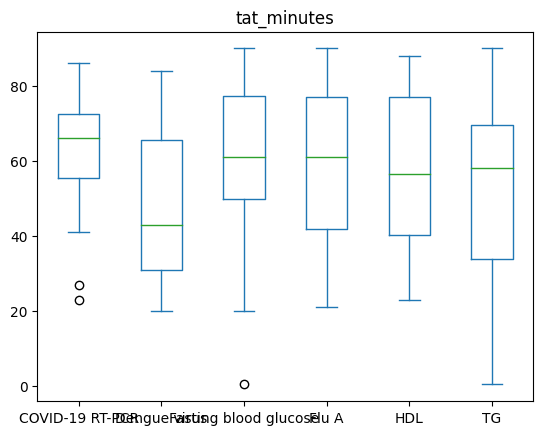

In [37]:
results_tests_df[['name', 'tat_minutes']].plot.box(by='name')

In [38]:
results_tests_df[['name', 'tat_minutes']].groupby('name').mean()

,tat_minutes
name,
COVID-19 RT-PCR,62.000000
Dengue virus,47.777778
Fasting blood glucose,60.371429
Flu A,58.181818
HDL,57.392857
TG,52.627976


<Axes: xlabel='name'>

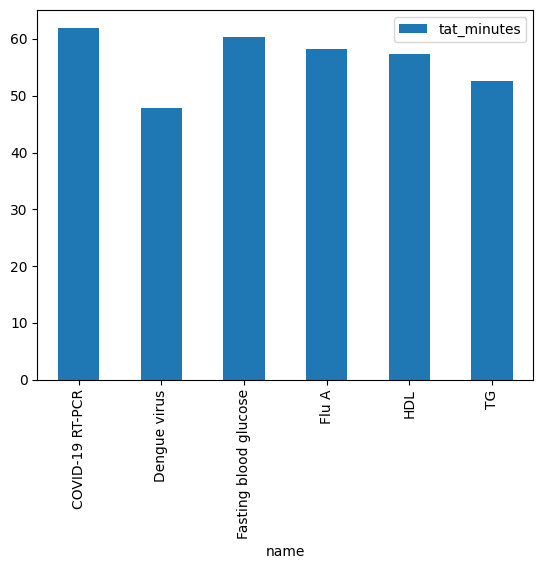

In [39]:
results_tests_df[['name', 'tat_minutes']].groupby('name').mean().plot.bar()